In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [32]:

class NeuralNetwork:
    def __init__(self, input_neurons=2, hidden_neurons1=32, hidden_neurons2=16, output_neurons=3, lr=0.01):
        self.input_neurons = input_neurons
        self.hidden_neurons1 = hidden_neurons1
        self.hidden_neurons2 = hidden_neurons2
        self.output_neurons = output_neurons

        self.W_HI = np.random.randn(self.input_neurons, self.hidden_neurons1)
        self.W_H2 = np.random.randn(self.hidden_neurons1, self.hidden_neurons2)
        self.W_OH = np.random.randn(self.hidden_neurons2, self.output_neurons)

        self.bias1 = np.random.rand(self.hidden_neurons1)
        self.bias2 = np.random.rand(self.hidden_neurons2)
        self.bias4 = np.random.rand(self.output_neurons)

        self.lr = lr

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.A1 = self.sigmoid(np.dot(X, self.W_HI) + self.bias1)
        self.A2 = self.sigmoid(np.dot(self.A1, self.W_H2) + self.bias2)
        self.output = self.softmax(np.dot(self.A2, self.W_OH) + self.bias4)
        return self.output

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.lr * output_error

        hidden_error2 = output_delta.dot(self.W_OH.T) * self.sigmoid(self.A2, der=True)
        hidden_delta2 = self.lr * hidden_error2

        hidden_error1 = hidden_delta2.dot(self.W_H2.T) * self.sigmoid(self.A1, der=True)
        hidden_delta1 = self.lr * hidden_error1

        self.W_HI += X.T.dot(hidden_delta1)
        self.W_H2 += self.A1.T.dot(hidden_delta2)
        self.W_OH += self.A2.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
        return output





In [33]:
def accuracy(Y_true, Y_pred):
    pred_classes = np.argmax(Y_pred, axis=1)
    true_classes = np.argmax(Y_true, axis=1)
    return np.mean(pred_classes == true_classes)

In [34]:
np.random.seed(42)
X, y = make_blobs(n_samples=60, centers=3, n_features=2, random_state=42)
Y_one_hot = np.zeros((y.size, 3))
Y_one_hot[np.arange(y.size), y] = 1

Y = np.zeros((y.size, 3))
Y[np.arange(y.size), y] = 1
def minmax_scale(X):
      X_min = X.min(axis=0)
      X_max = X.max(axis=0)
      return (X - X_min) / (X_max - X_min)
X = minmax_scale(X)

Epoch 0, Loss: 0.389898
Epoch 100, Loss: 0.049333
Epoch 200, Loss: 0.015781
Epoch 300, Loss: 0.007250
Epoch 400, Loss: 0.004086
Epoch 500, Loss: 0.002610
Epoch 600, Loss: 0.001811
Epoch 700, Loss: 0.001332
Epoch 800, Loss: 0.001023
Epoch 900, Loss: 0.000812


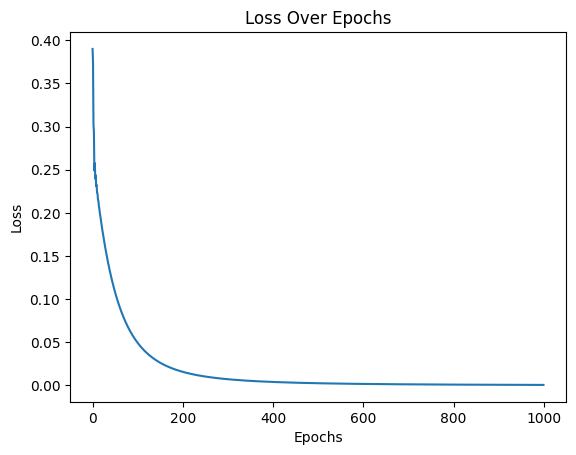

In [40]:
NN = NeuralNetwork()
losses = []
acc = []

for epoch in range(1000):
    pred = NN.feedForward(X)
    loss = np.mean(np.square(Y_one_hot - pred))
    losses.append(loss)
    acc.append(accuracy(Y_one_hot, pred))
    NN.train(X, Y_one_hot)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.6f}")

plt.plot(losses)
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


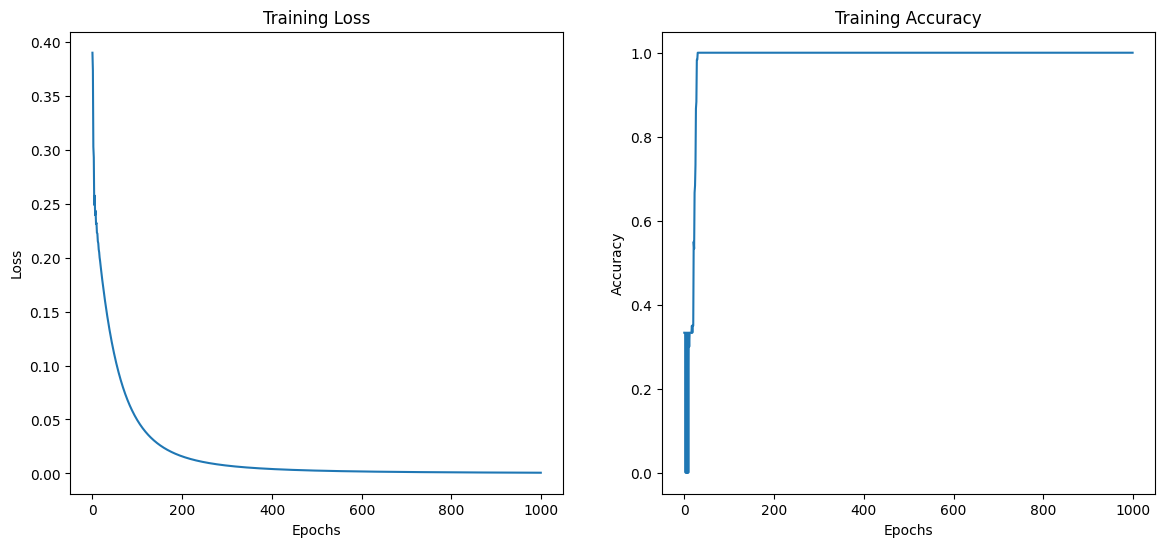

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(acc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')

plt.show()


Text(0, 0.5, 'Feature 2')

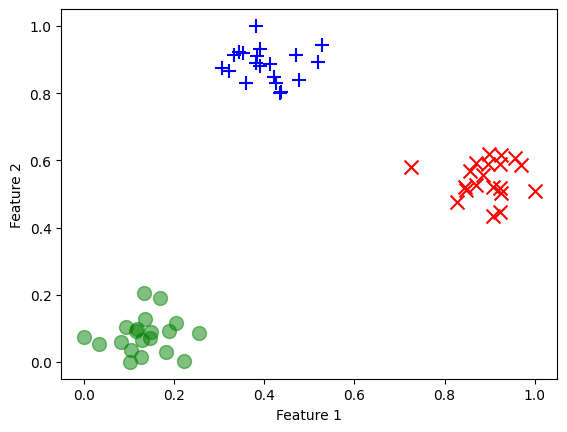

In [42]:
X, y = make_blobs(n_samples=60, centers=3, n_features=2, random_state=42)
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='+', s=100)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='x', s=100)
plt.scatter(X[y == 2, 0], X[y == 2, 1], c='green', marker='o',alpha=0.5, s=100)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

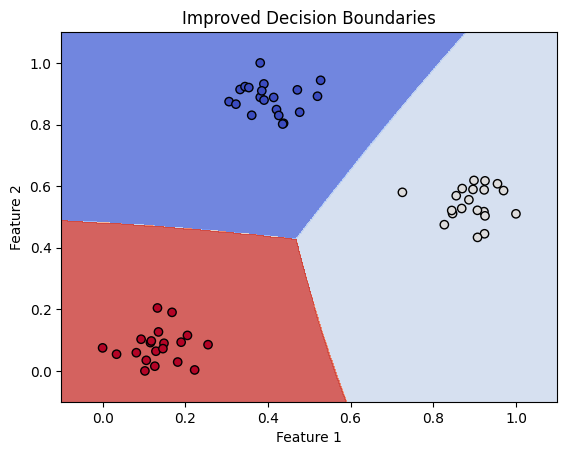

In [43]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = NN.feedForward(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1), cmap="coolwarm", edgecolor="k")
plt.title("Improved Decision Boundaries")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
